# Random Forest Classifier for Sentiment Analysis of Conversations

In [47]:
from scipy.io.wavfile import read, write
import librosa

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from Audio_Preprocess import *

In [31]:
# Import data
npz = np.load('Sentiment_analysis_data.npz')
x = npz['inputs']
y = npz['targets']

In [32]:
# Standarise data
scaled_x = preprocessing.scale(x)

In [33]:
# Shuffle data
n = x.shape[0]
shuffled_indices = np.arange(n)
np.random.shuffle(shuffled_indices)

shuffled_x = scaled_x[shuffled_indices]
shuffled_y = y[shuffled_indices]

In [34]:
# Merge inputs and targets
data = add_label_arrays(shuffled_x, np.expand_dims(shuffled_y, axis=1))

In [35]:
# Create dataframe from numpy arrays
columns = [ 'c' + str(i) for i in range(28) ] + [ 'label' ]
df = pd.DataFrame(data=data, columns=columns)
df.head(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c19,c20,c21,c22,c23,c24,c25,c26,c27,label
0,-1.722461610369643,-0.45461745718567814,-0.33842945736291413,-0.6957676991252877,-0.47381413270230033,-0.35901413128027476,-1.0566666708024697,1.7676312113963568,0.7458391822012702,0.7698676572844283,...,0.008572988785990197,0.13915703506778995,-0.8489397819865642,-0.7612704825142728,0.046223099497422024,-0.30997973188523026,-0.861468661510853,-1.4096447225537607,1.3958971731871137,angry
1,-0.03384524881151424,0.9662435497556751,-0.7862739209249177,1.3392327611958292,1.4228524875997093,-0.9055246751124659,0.1746244517423411,0.89137837626366,-0.7586200259563617,-0.6808636442059773,...,0.5259730734122335,-0.8405825723200094,0.23559596437612032,-0.41554550467521434,0.4046487806340777,-0.39611316442791167,-0.48771300617772334,-0.12945309358077672,0.8809525101926431,neutral
2,0.465467702527864,0.1456830717210975,-0.17586021154235107,0.3713835193035593,0.24343944011373914,0.44703636351971743,-0.2809292435710941,1.5628620145495773,-0.5184643547931687,0.039549950053704916,...,0.40862770192492576,-0.6556398310135068,-0.7724708164529949,-0.3174189257565474,-0.32043644663000936,-0.5870691728735058,-0.01467311381104365,-0.015581521903346808,0.6052132655357902,neutral
3,0.04851052457015312,-1.3873328281774515,0.6692818476478491,-0.09119449483557908,-1.6879803605740944,1.3726216188220497,-1.5902045704049823,-0.940548652464377,1.7213641900011585,-1.6382403109553842,...,-0.21725540936554283,0.0028664464530281587,-0.4286113697385126,-0.0010842922310563166,-0.10460223380440965,0.6451864060371535,-0.26659669298118477,-0.5564540135370656,-0.5285182425658939,fear
4,0.24479126205985544,-0.8907570193940595,0.5897451984791496,-0.9199370881632281,0.908962341376741,0.15364885337599224,1.0476958602542379,1.1396402828528491,0.045768424942526524,1.555974488874848,...,0.6233746812885239,0.6931529942123552,1.8506712438616388,1.3447444117975882,1.7946088858709475,1.994939351556718,0.636713012033803,1.2983100861283685,-0.3166016788704323,surprise


In [37]:
# Create training and testing sets
X = df.iloc[:,:-1]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
print(X_train.shape, y_train.shape)

(2089, 28) (2089,)


In [41]:
# Define Random Forest Classifier model and predict label
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X, y)
y_test_pred = rf.predict(X_test)

In [43]:
# Get probability of prediction
y_test_prob = rf.predict_proba(X_test)

In [44]:
# Get score of prediction
rf.score(X_test, y_test)

0.7546628407460545

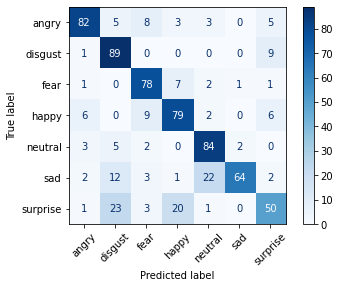

In [53]:
disp = plot_confusion_matrix(rf, X_test, y_test,
                             cmap=plt.cm.Blues,
                             xticks_rotation=45)